In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Local Library
from Properties import get_properties, display

# Load properties from Properties.py helper
# and unpack them into local variables
properties = get_properties("50-samples.csv")
display(properties)
locals().update(properties)

tealScale = {
  0: '#E0F2F1', 1: '#B2DFDB', 2: '#80CBC4',
  3: '#4DB6AC', 4: '#26A69A', 5: '#009688',
  6: '#00897B', 7: '#00796B', 8: '#00695C',
  9: '#004D40'
}

n          =   13
∑x (total) =   78.00
∑y (total) = 2327.00
x̄ (mean)   =    6.00
ȳ (mean)   =  179.00

sₓ² (variance) =     15.17
sy² (variance) =  25768.17
covariance     =    606.67
sₓ (std dev)   =      3.89
sy (std dev)   =    160.52
m (slope)      =     40.00
b (intercept)  =    -61.00

Equation     y = -61.00 + 40.00.x



In [2]:
def get_CI() -> float:
  # Create regression line
  y_fit = m_slope * x_observed + b_intercept
  y_err = y_observed - y_fit

  # Calculate variance of residuals (MSE)
  var_residuals = np.sum(y_err ** 2) / (n - 2)

  SE = np.sqrt(var_residuals)

  # Calculate the confidence interval
  # for the predictions using 95% confidence
  return 1.96 * SE

In [3]:
def plot() -> int:
  plt.figure(figsize=(10, 6))

  # Plot the data and regression line
  plt.scatter(x_observed, y_observed,
    color=tealScale[9], label='Data Points')
  plt.plot(x_observed, y_fit,
    color=tealScale[5], label='Regression Line')

  plt.plot(x_observed, y_fit + y_std_dev,
    c=tealScale[1], linestyle='--')
  plt.plot(x_observed, y_fit - y_std_dev,
    c=tealScale[1], linestyle='--',
    label='Regression ± Standard Deviation')

  # Fill between upper and lower bounds
  CI = get_CI()
  plt.fill_between(x_observed,
  y_fit - CI, y_fit + CI,
  color=tealScale[1], alpha=0.3,
  label='Standard Error')

  # Chart Decoration
  plt.title('Standard Deviation and Standard Error')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.grid(True)

  plt.show()

  return 0

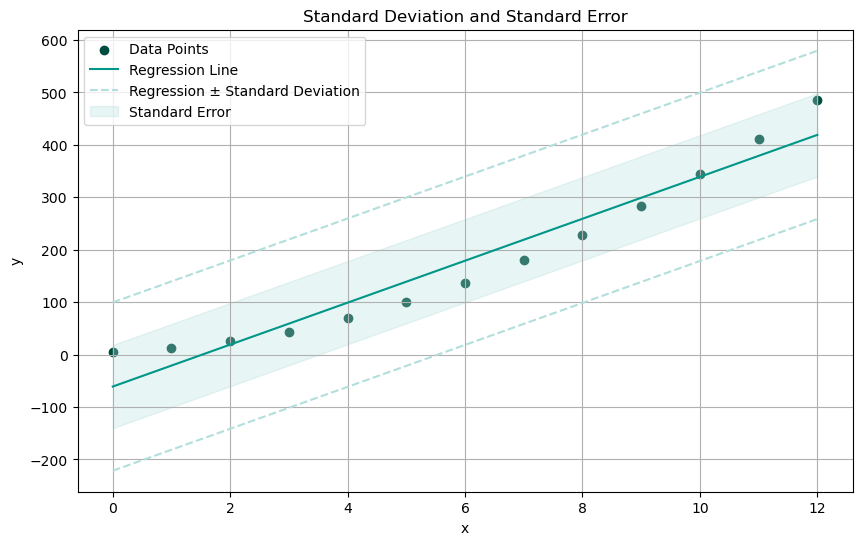

In [4]:
if __name__ == "__main__":
  plot()